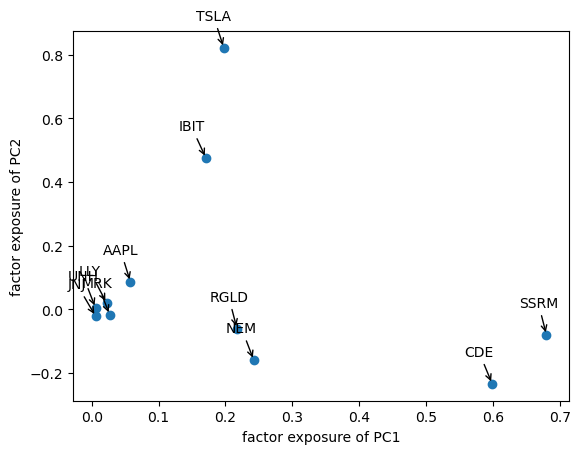

In [ ]:
import numpy as np
import pandas as pd
from openbb import obb
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
obb.user.preferences.output_type = "dataframe"

symbols = ["NEM","RGLD","SSRM","CDE","LLY","UNH","JNJ","MRK","TSLA","AAPL","IBIT"]
data = obb.equity.price.historical(
    symbols,
    start_date="2024-01-01",
    end_date="2025-01-01",
    provider="yfinance"
).pivot(columns="symbol",values="close")
returns = data.pct_change().dropna()
pca = PCA(n_components=3)
pca.fit(returns)

factor_exposures = pd.DataFrame(
    pca.components_,
    index=["PC1","PC2","PC3"],
    columns=returns.columns
)
labels = factor_exposures.columns
data = factor_exposures.values
plt.scatter(data[0, :], data[1, :])
plt.xlabel("factor exposure of PC1")
plt.ylabel("factor exposure of PC2")
for label,x,y in zip(labels, data[0, :], data[1, :]):
    plt.annotate(
        label,
        xy=(x,y),
        xytext=(-20,20),
        textcoords="offset points",
        arrowprops=dict(
            arrowstyle="->",
            connectionstyle="arc3,rad=0"
        )
    )
### factor_returns = X.dot(pca.components_.T)
# factor_returns = pd.DataFrame(
#     columns=["PC1","PC2","PC3"],
#     index=returns.index,
#     data=factor_returns
# )
# factor_returns

